The Machine Learner Within
===============

As Scientists you may be familiar with Machine Learning before. If you have played with some sort of function fitting then you have seen some aspect of Machine Learning(ML).

It is the current HOT topic, and it looks good on your resume. People think its alchemy and some people have very strong opinions about it.
But I am going to show you how you can use it in your daily life (or scientific career).

### MACHINE LEARNING, WHAT IS? ###

Machine learning is a glorified way of finding a function iteratively. (Basically, Newton's method, on steroids).
These functions need not be something analytic nor should look like any standard function you think of when you hear the word function.

ML is useful for forecasting, finding patterns, function fitting, classifying and plenty more.

#### Machine Learning usually goes in the following steps: ####
1. What is your problem?
2. Getting and preparing your data
3. Try out different algorithms
4. Evaluate your results
5. Improve your results
6. Start all over again
7. ???
8. Profit


Today, we will go through the above steps (Till 4) and solve a problem.
But before we do that



The following is what is required of your computer. You can pip install all of these.
* scipy (for scientific libraries)
* numpy (for number crunching)
* matplotlib (for fun plots)
* pandas (for manipulating data tables)
* sklearn (for already preconcocted ML algorithms)

Once your libraries are installed and data downloaded;
open up a fresh, nice and shiny jupyter notebook.

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

STEP 1: WHAT'S YOUR PROBLEM?
================

A lot of times new questions appear once you start playing around with the datasets. Other times you start off with a question and collect your data. In our case we will go with the latter.

A machine learning question is usually 
* Predict what the next data point is going to be (regression, prediction)
* What class does my data fall into (classification)
* I have all this data puked at me, figure out what groups with what (clustering/unsupervised learning)
* I want to replace my annoying co-worker/student with code (Deep Learning)

We will be dealing with classification problem today. 

### If all of us present here were to go aboard on the titanic. How many of us would survive? ###

STEP 2: GETTING AND PREPARING YOUR DATA
======================

Once you identified your problem, in our case our titanic survival scenario, you collect data. You could solve this problem either by simulation, or consider all passengers to have boarded the titanic and see whether there is a pattern that emerges that tells you your chance of survival.

The model itself captures this pattern. **It need not be a correlated pattern that you can clearly make sense off**. Many times the pattern is so weirdly mixed with the parameters that the model does feel like a black box.

It is very important to take some data out and keep it aside, so that you know that the model is actually learning a pattern and not just memorizing every value. This "kept on the side data" is called **_test data_**

The data that the model actually sees and finds pattern/function from is called **_training data_**

I keep a ratio of 80:20. 80% of data goes into finding a pattern and 20% goes into testing.

Thankfully, all titanic data is cleaned, differentiated into test and train and given to us by Kaggle. Get your data here:
https://www.kaggle.com/c/titanic/data

Make sure you unpack your data in the same folder as your Jupyter Notebook.



In [3]:
#Load the dataset

train_dat = pd.read_csv("train.csv")
train_dat

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

SibS? Parch? Embarked? What do these columns mean? The meaning about the data presented to you is called **Metadata** and is very crucial in all of datascience. The kaggle link above will tell you more information about your data so that you can make important decisions such as 
*What columns to remove?, What values to clean (remove any NaN values)?, etc.*

You can come up with more.

Let's remove Ticket numbers, PassengerId, maybe that won't be helpful in providing any pattern information

In [4]:
del train_dat['Ticket']
del train_dat['Cabin']
del train_dat['PassengerId']
train_dat

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
5           0       3                                   Moran, Mr. James   
6           0       1                            McCarthy, Mr. Timothy J   
7           0       3                     Palsson, Master. Gosta Leonard   
8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           1       2                Nasser, Mrs. Nicholas (Adele Achem)   
10          1       3                    Sandstrom, Miss. Marguerite Rut   
11          1       1                           Bonnell, Miss. Elizabeth   
12          0       3                     Saundercock, Mr. William Henry   
13          0       3                        Andersson, Mr. Anders Johan   
14          0       3               Vestrom, Miss. Hulda Amanda Adolfina   
15          1       2                   Hewlett, Mrs. (Mary D Kingcome)    
16          0       3                               Rice, Master. Eugene   
17          1       2                       Williams, Mr. Charles Eugene   
18          0       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
19          1       3                            Masselmani, Mrs. Fatima   
20          0       2                               Fynney, Mr. Joseph J   
21          1       2                              Beesley, Mr. Lawrence   
22          1       3                        McGowan, Miss. Anna "Annie"   
23          1       1                       Sloper, Mr. William Thompson   
24          0       3                      Palsson, Miss. Torborg Danira   
25          1       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
26          0       3                            Emir, Mr. Farred Chehab   
27          0       1                     Fortune, Mr. Charles Alexander   
28          1       3                      O'Dwyer, Miss. Ellen "Nellie"   
29          0       3                                Todoroff, Mr. Lalio   
..        ...     ...                                                ...   
861         0       2                        Giles, Mr. Frederick Edward   
862         1       1  Swift, Mrs. Frederick Joel (Margaret Welles Ba...   
863         0       3                  Sage, Miss. Dorothy Edith "Dolly"   
864         0       2                             Gill, Mr. John William   
865         1       2                           Bystrom, Mrs. (Karolina)   
866         1       2                       Duran y More, Miss. Asuncion   
867         0       1               Roebling, Mr. Washington Augustus II   
868         0       3                        van Melkebeke, Mr. Philemon   
869         1       3                    Johnson, Master. Harold Theodor   
870         0       3                                  Balkic, Mr. Cerin   
871         1       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
872         0       1                           Carlsson, Mr. Frans Olof   
873         0       3                        Vander Cruyssen, Mr. Victor   
874         1       2              Abelson, Mrs. Samuel (Hannah Wizosky)   
875         1       3                   Najib, Miss. Adele Kiamie "Jane"   
876         0       3                      Gustafsson, Mr. Alfred Ossian   
877         0       3                               Petroff, Mr. Nedelio   
878         0       3                                 Laleff, Mr. Kristo   
879         1       1      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   
880         1       2       Shelley, Mrs. William (Imanita Parrish Hall)   
881         0       3                                

Let's try and see any correlations between any of the variables we see here. Seeing connections and correlations is a **very important** aspect of understanding your data. Before you can fit any model/do any of the meaty machine learning, you need to understand your data very well. That way you can make the best use of it.

So, let's take a look at the variables and how they affects survivability.

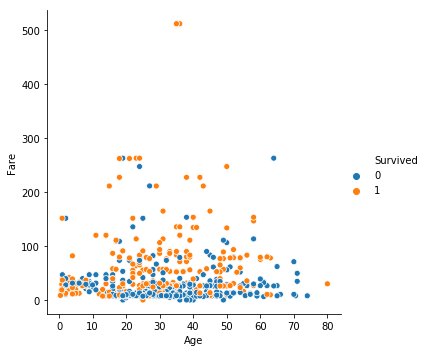

In [5]:
#Age and Survivability
sns.relplot(x="Age",y="Fare", hue="Survived", data=train_dat)
plt.show()

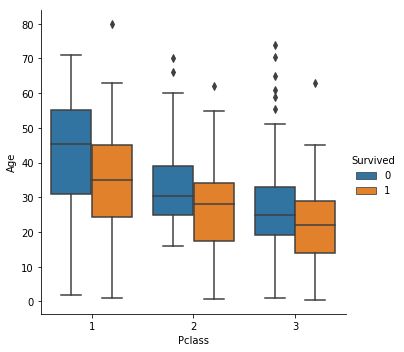

In [6]:
sns.catplot(x="Pclass",y="Age", hue="Survived", data=train_dat, kind="box")
plt.show()

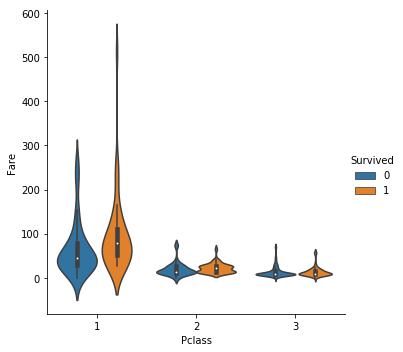

In [7]:
sns.catplot(x="Pclass",y="Fare", hue="Survived", data=train_dat, kind="violin")
plt.show()

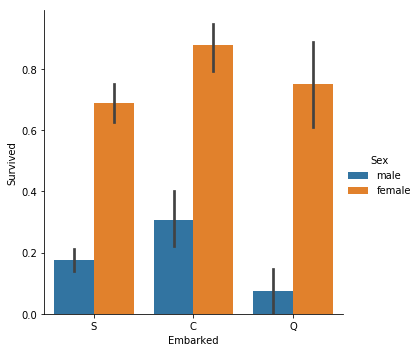

In [11]:
sns.catplot(y="Survived",x="Embarked", hue="Sex", data=train_dat, kind="bar")
plt.show()

Along with plotting we can use some pandas functions to get mean,median,variance and other statistical information of each parameter using a pandas function called `describe`.

In [35]:
train_dat.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

STEP 3: ALGORITHM TIME
=============

Now we know some information about our data, we could move onto writing/using algorithms that'll be useful in finding said patterns. We can see some patterns above, such as those who paid more survived (and higher the class the higher your survival chance), also in each class if the mean age of survival was younger than the mean age of people who died.

Our machine learning models will help us capture these patterns.

The models we shall use would be:
* Decision Tree (if else model)
* Guassian Naive Bayes (probabilistic model)
* Support Vector Machines (Classify with lines)

We will try and compare how well these do.

** Note: Each classifier takes in input very differently. So you have to arrange and prepare your data in a way that your classifier can eat it. **

### A. DECISION TREE ###

We will start by building a decision tree. A decision tree is like a if-else tree. You make one in your head when you deciding food from a menu.

A simple model, let's see how it performs. We have preconcocted classifiers thanks to sklearn!!

In [30]:
from sklearn.tree import DecisionTreeClassifier
Tree_clf = DecisionTreeClassifier()

#Prepare to feed your classifier!
X_ = train_dat.iloc[:,1:]
del X_["Name"]
Y_ = train_dat["Survived"]
print(X_.dtypes)
print(Y_.dtypes)

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object
int64


Pclass         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200

In [ ]:
Tree_clf.fit(X_,Y_)

**\*GASP!\*** , **_we have NaN values_**. We haven't prepared our data well. Make sure you clean your data, format it nicely AND **THEN FEED TO CLASSIFIER**

From the dataset we need to fill the age variable. 
We can either randomly add an age.

But, we can make use of all the information we have from other records. Why don't we use that to fill our Age value.

The first step is to look at the correlations between age and other variables. Then see which ones are most correlated.

In [42]:
#Look at correlations between Age and other variables
#Use the awesome corr function! 
print("Correlation with Fare is ", X_["Age"].corr(X_["Fare"]))
print("Correlation with Pclass is ", X_["Age"].corr(X_["Pclass"]))
print("Correlation with SibSp is ", X_["Age"].corr(X_["SibSp"]))
print("Correlation with Parch is ", X_["Age"].corr(X_["Parch"]))
print("Correlation with Sex is ", X_["Age"].corr(X_["Sex"]))

('Correlation with Fare is ', 0.09606669176903887)
('Correlation with Pclass is ', -0.36922601531551724)
('Correlation with SibSp is ', -0.30824675892365644)
('Correlation with Parch is ', -0.18911926263203513)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

** ERROR! **. Why did this happen? That is because we need to set the `Sex` variable to a numeric type. So a good way usually people represent binary things like Sex is just with 0 and 1.


In [ ]:
#Get your test data
test_dat = pd.read_csv("test.csv")
test_dat = 

But this is all our training data